In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from astropy.time import Time

In [2]:
plt.style.use('ggplot')

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('light_curves_181646914411688960_200261994165010176.csv')

In [5]:
df['time'] = df['time'].astype(np.float32)

In [6]:
df.head()

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
0,181646914411688960,17390384531924047,G,1711.339722,15.674099,10132.264128,64.670419,156.67540,False,True,4101,369295549951641967
1,181646914411688960,19240383064740421,G,1744.799194,15.713665,9769.679686,18.609422,524.98566,False,False,1,369295549951641967
2,181646914411688960,19250123867579313,G,1744.975342,15.703185,9864.433111,14.214431,693.97314,False,False,1,369295549951641967
3,181646914411688960,26786862375244063,G,1881.271729,15.706703,9832.526462,31.084255,316.31854,False,False,4097,369295549951641967
4,181646914411688960,28490402782028622,G,1912.076416,15.698724,9905.046149,13.649018,725.69660,False,False,1,369295549951641967


In [17]:
sources=df['source_id'].unique()

In [35]:
df['source_id'].value_counts().head()

184854434646126080    141
187839539996486272    140
188743269835075456    138
188733271151219584    136
187838814144889600    135
Name: source_id, dtype: int64

In [69]:
grouped = df.groupby(['source_id', 'band', 'time'])['flux_over_error'].first().reset_index()

In [70]:
grouped = grouped.loc[grouped['band'] == 'G']
grouped = grouped.drop('band', axis=1)

In [59]:
test=grouped.groupby('source_id')[['time','flux_over_error']].apply(lambda x: list(x.values))

In [65]:
test.to_dict()

{181646914411688960: [array([1711.33972168,  156.6754    ]),
  array([1744.79919434,  524.98566   ]),
  array([1744.9753418,  693.97314  ]),
  array([1881.27172852,  316.31854   ]),
  array([1912.07641602,  725.6966    ]),
  array([1912.25256348,  514.0668    ]),
  array([1931.82763672,  419.2526    ]),
  array([2068.78344727,  371.023     ]),
  array([2102.51611328,  487.90146   ]),
  array([2119.02099609,  474.2522    ]),
  array([2119.0949707,  582.47534  ]),
  array([2212.8503418,  838.53955  ]),
  array([2213.10058594,  583.41565   ]),
  array([2213.17456055,  544.9636    ]),
  array([2213.35083008,  632.5876    ]),
  array([2213.42480469,  633.3563    ]),
  array([2213.60083008,  447.3042    ]),
  array([2213.67480469,  733.8056    ]),
  array([2213.85107422,  508.34274   ]),
  array([2213.92504883,  785.13586   ]),
  array([2214.17504883,   52.56661   ]),
  array([2215.67602539,  287.21484   ]),
  array([2215.85205078,  517.72003   ]),
  array([2215.92602539,  500.60507   ]),
  

In [48]:
test=test.to_dict()[181646914411688960]

In [54]:
np.stack(test)[:,1]

array([ 156.6754 ,  524.98566,  693.97314,  316.31854,  725.6966 ,
        514.0668 ,  419.2526 ,  371.023  ,  487.90146,  474.2522 ,
        582.47534,  838.53955,  583.41565,  544.9636 ,  632.5876 ,
        633.3563 ,  447.3042 ,  733.8056 ,  508.34274,  785.13586,
         52.56661,  287.21484,  517.72003,  500.60507,  629.8487 ,
        416.09183,  677.9941 ,  475.36194,  570.5728 , 1117.7452 ,
        515.12366,  535.0425 , 1000.7708 ,  408.4033 ,  646.7761 ,
        318.63098,  429.5829 ])

In [72]:
plot_data = grouped.loc[grouped['source_id'] == sources[108]]
# plot_data = plot_data.loc[plot_data['band'] == 'G']

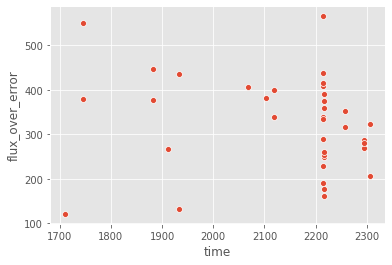

In [74]:
sns.scatterplot(x='time', y='flux_over_error', data=plot_data)

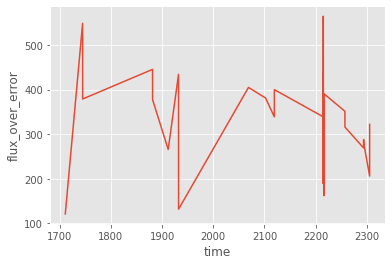

In [75]:
sns.lineplot(x='time', y='flux_over_error', data=plot_data)

In [76]:
plot_data

,source_id,time,flux_over_error
7966,184832959806617344,1711.162476,121.34244
7967,184832959806617344,1744.974243,548.74176
7968,184832959806617344,1745.048218,379.02615
7969,184832959806617344,1881.522095,445.47153
7970,184832959806617344,1881.596069,377.49615
7971,184832959806617344,1912.077515,265.86850
7972,184832959806617344,1932.254272,434.36390
7973,184832959806617344,1932.328247,131.96625
7974,184832959806617344,2068.782471,405.00443
7975,184832959806617344,2102.089600,381.38455


In [ ]:
df.groupby('source_id')['time'].apply(lambda x: x.max() - x.min()).hist()

Max diff follows poisson distribution

In [ ]:
df.groupby('source_id')['flux_over_error'].apply(lambda x: x.max() - x.min()).hist()

In [ ]:
df['other_flags'].value_counts()

In [ ]:
df['source_id'].value_counts().hist()

In [ ]:
df['band'].value_counts()

In [ ]:
df['source_id'].value_counts().head()

In [ ]:
src = df.loc[df['source_id'] == 184854434646126080]

In [ ]:
src.sort_values(by='time', inplace=True)

In [ ]:
src

In [ ]:
times = src['time'].values

In [ ]:
times = Time(times, format='mjd')

In [ ]:
# times.utc.iso

In [ ]:
src['utc'] = times.utc.iso

In [ ]:
src

In [ ]:
plot_data = src[src['band'].isin(['BP','RP'])]

In [ ]:
plt.figure(figsize=(7,5))
sns.lineplot(x='time', y='flux_over_error', hue='band', data=plot_data)